In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

In [41]:
url = 'https://raw.githubusercontent.com/Dmytro-Mld/Data-Analysis-Lab1/refs/heads/main/Dataset/StudentsPerformance.csv'
df = pd.read_csv(url)

Виведемо назви колонок і розмір датасета

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

Опрацюємо пропуски

In [7]:
print(df.isnull().any())

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool


Даний датасет пропусків не має, але має стрінгові рядки, які не потрібні нам для подальшої роботи. Зробимо копію датасету тільки з рядками, які мають числові значення.

Побудуємо heatmap

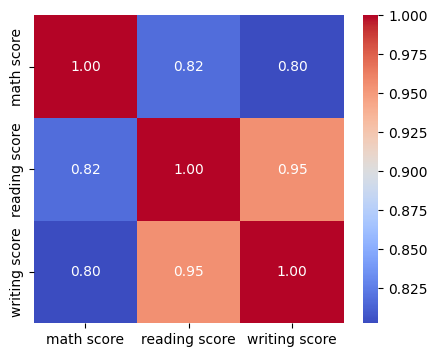

In [8]:
df_c = df[['math score', 'reading score', 'writing score']].copy()

corr = df_c.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

Побудуємо гістограми

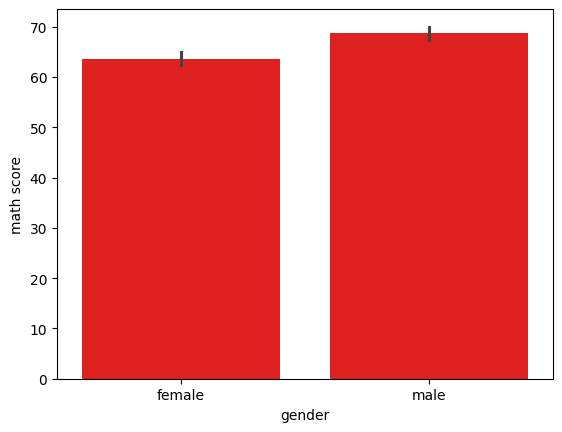

In [9]:
sns.barplot(
    x='gender',
    y='math score',
    data=df,
    color='red',
    );

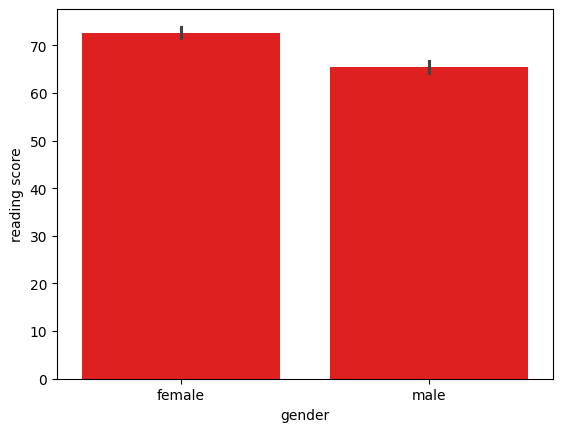

In [10]:
sns.barplot(
    x='gender',
    y='reading score',
    data=df,
    color='red',
    );

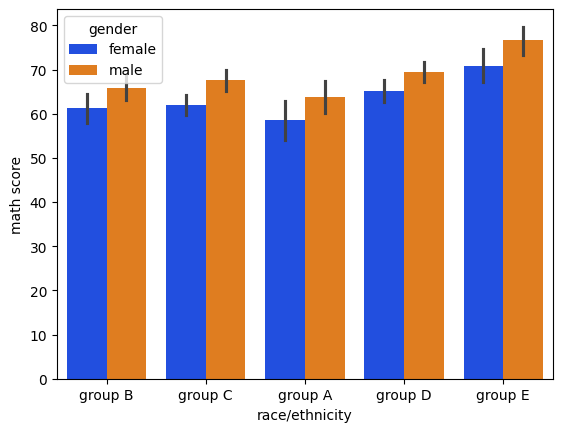

In [11]:
sns.barplot(
    x='race/ethnicity',
    y='math score',
    data=df,
    palette='bright',
    hue='gender');

boxplot

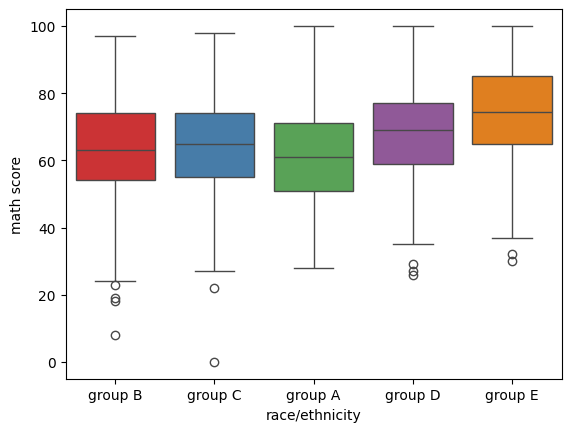

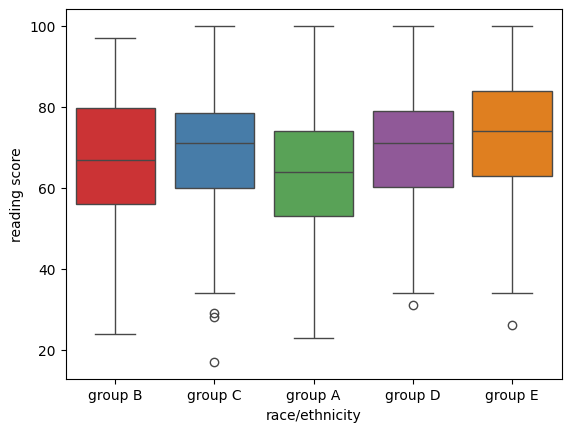

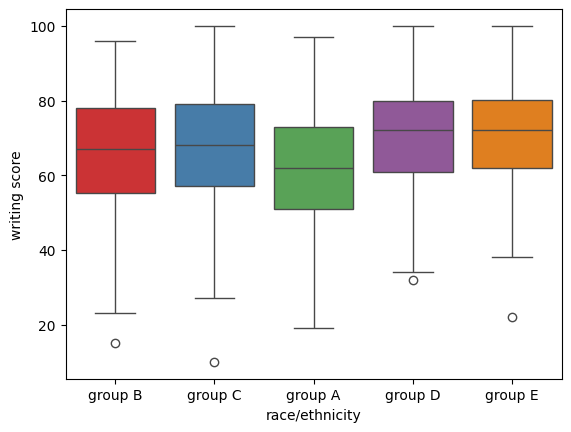

In [12]:
clmns = list(df.columns)
clmns = clmns[-3:]

for i in range(len(clmns)):
    figure = plt.figure()
    ax = sns.boxplot(x='race/ethnicity', y=clmns[i], data=df, hue = 'race/ethnicity', palette='Set1') #Для того щоб отримати різнокольорові bosplot, додамо: hue = x, palette='Set1'

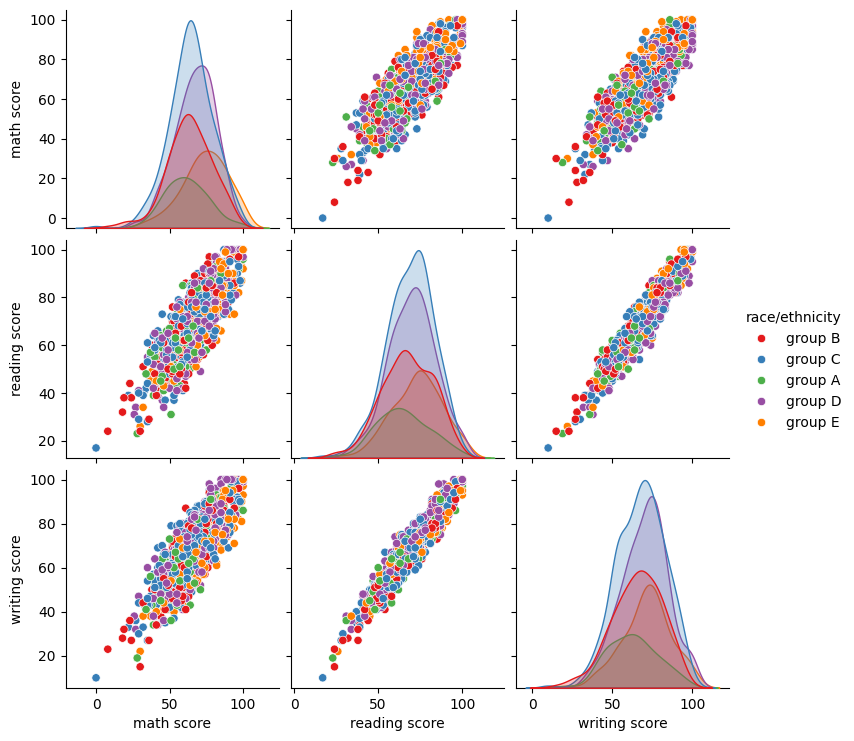

In [13]:
sns.pairplot(df, hue="race/ethnicity", palette = 'Set1')

Нормалізуємо дані

In [14]:
df_normalized = df.copy()

# apply normalization techniques
for i in range(len(clmns)):
    df_normalized[clmns[i]] = df_normalized[clmns[i]]  / df_normalized[clmns[i]].abs().max()



# view normalized data
display(df_normalized)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.72,0.72,0.74
1,female,group C,some college,standard,completed,0.69,0.90,0.88
2,female,group B,master's degree,standard,none,0.90,0.95,0.93
3,male,group A,associate's degree,free/reduced,none,0.47,0.57,0.44
4,male,group C,some college,standard,none,0.76,0.78,0.75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.88,0.99,0.95
996,male,group C,high school,free/reduced,none,0.62,0.55,0.55
997,female,group C,high school,free/reduced,completed,0.59,0.71,0.65
998,female,group D,some college,standard,completed,0.68,0.78,0.77



Data Preprocessing

In [15]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   float64
 6   reading score                1000 non-null   float64
 7   writing score                1000 non-null   float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [16]:
df_normalized['gender'] = LabelEncoder().fit_transform(df_normalized['gender'])

In [17]:
df_normalized['race/ethnicity'] = LabelEncoder().fit_transform(df_normalized['race/ethnicity'])

In [18]:
df_normalized['parental level of education'] = LabelEncoder().fit_transform(df_normalized['parental level of education'])

In [19]:
df_normalized['lunch'] = LabelEncoder().fit_transform(df_normalized['lunch'])

In [20]:
df_normalized['test preparation course'] = LabelEncoder().fit_transform(df_normalized['test preparation course'])

In [21]:
display(df_normalized)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,0.72,0.72,0.74
1,0,2,4,1,0,0.69,0.90,0.88
2,0,1,3,1,1,0.90,0.95,0.93
3,1,0,0,0,1,0.47,0.57,0.44
4,1,2,4,1,1,0.76,0.78,0.75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,0.88,0.99,0.95
996,1,2,2,0,1,0.62,0.55,0.55
997,0,2,2,0,0,0.59,0.71,0.65
998,0,3,4,1,0,0.68,0.78,0.77


Train Test Split

In [22]:
X = df_normalized.drop(['gender'], axis = 1)
y = df_normalized['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Standardize the Variables

In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(X_train)

StandardScaler()

In [25]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

kNN Model

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)

In [27]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [28]:
pred = knn.predict(scaled_X_test)

In [29]:
print(confusion_matrix(y_test,pred))

[[88 24]
 [24 64]]


In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       112
           1       0.73      0.73      0.73        88

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [31]:
print(accuracy_score(y_test,pred))

0.76


In [32]:
error_rate = [] #обрахуємо частку помилок

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

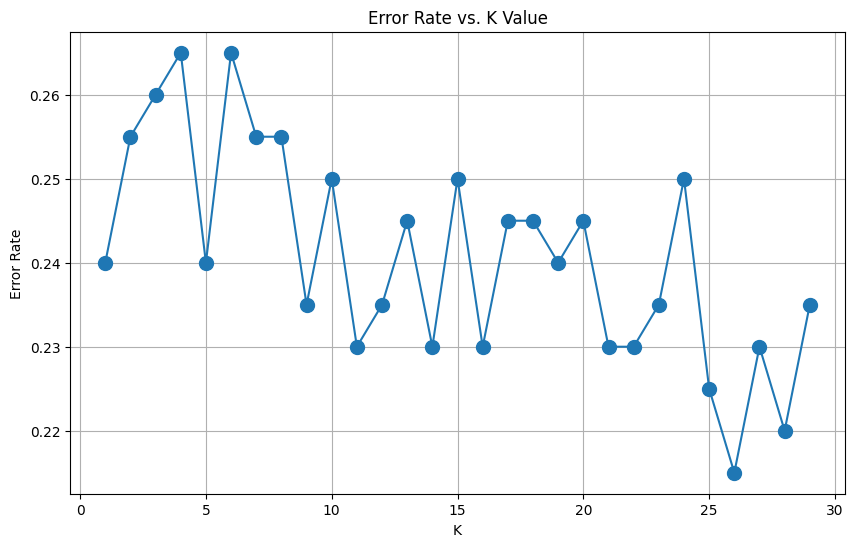

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [34]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))

[[92 20]
 [30 58]]


In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79       112
           1       0.74      0.66      0.70        88

    accuracy                           0.75       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.75      0.75       200



In [36]:
print(accuracy_score(y_test,pred))

0.75


In [37]:
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))

[[92 20]
 [26 62]]


In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       112
           1       0.76      0.70      0.73        88

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.77       200



In [39]:
print(accuracy_score(y_test,pred))

0.77


Дерево ухвалення рішень

In [45]:
display(df_normalized)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,0.72,0.72,0.74
1,0,2,4,1,0,0.69,0.90,0.88
2,0,1,3,1,1,0.90,0.95,0.93
3,1,0,0,0,1,0.47,0.57,0.44
4,1,2,4,1,1,0.76,0.78,0.75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,0.88,0.99,0.95
996,1,2,2,0,1,0.62,0.55,0.55
997,0,2,2,0,0,0.59,0.71,0.65
998,0,3,4,1,0,0.68,0.78,0.77


In [82]:
X = df_normalized.drop(['lunch', 'gender'], axis = 1)
y = df_normalized['gender']

In [83]:
set(y)

{0, 1}

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [85]:
print(type(X), type(y))
print(X_train.shape, y_train.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(800, 6) (800,)


Дерево ухвалення рішень

In [86]:
model = DecisionTreeClassifier(criterion='gini')

In [87]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [88]:
y_pred = model.predict(X_test)

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        99
           1       0.81      0.75      0.78       101

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.78       200



In [90]:
print(confusion_matrix(y_test, y_pred))

[[81 18]
 [25 76]]


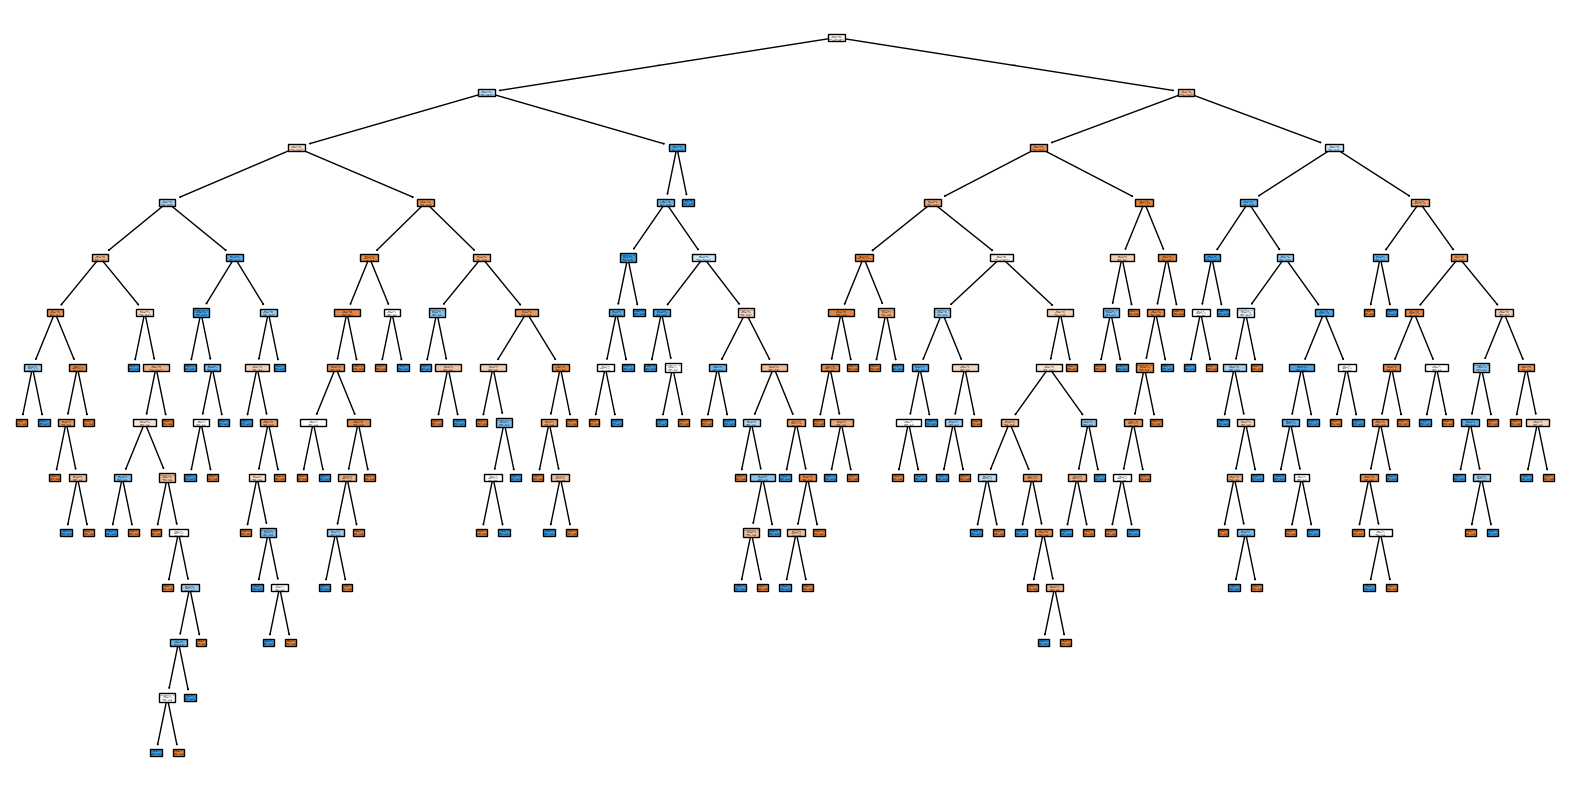

In [93]:
plt.figure(figsize = (20, 10))
plot_tree(model, feature_names = ['race/ethnicity', 'parental level of education', 'test preparation course', 'math score',  'reading score', 'writing score'],
          class_names = ['male', 'female'], filled = True)
plt.show()

SVC + GreedSearch для пошуку параметрів C та gamma

In [96]:
X = df_normalized.drop(['lunch', 'gender'], axis = 1)
y = df_normalized['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) #random_state=101 - щоб отримати одні і ті ж дані при кожному запуску

In [97]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [98]:
model = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')

In [99]:
model.fit(scaled_X_train,y_train)

SVC(gamma=1.0)

In [100]:
y_pred = model.predict(scaled_X_test)

In [101]:
print(confusion_matrix(y_test, y_pred))

[[127  22]
 [ 26 125]]


In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       149
           1       0.85      0.83      0.84       151

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [103]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [104]:
grid = GridSearchCV(SVC(), param_grid, refit=True)

In [105]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [106]:

grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [107]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [109]:
grid_predictions = grid.predict(scaled_X_test)

print(confusion_matrix(y_test,grid_predictions))

[[133  16]
 [ 16 135]]


In [110]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       149
           1       0.89      0.89      0.89       151

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



Random Forest

In [113]:
model = RandomForestClassifier(n_estimators=100)

In [114]:
X = df_normalized.drop(['lunch', 'gender'], axis = 1)
y = df_normalized['gender']

In [115]:
set(y)

{0, 1}

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [117]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [118]:
y_pred = model.predict(X_test)

In [119]:
print(confusion_matrix(y_test, y_pred))

[[93 11]
 [15 81]]


In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       104
           1       0.88      0.84      0.86        96

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



In [122]:
print(accuracy_score(y_test,y_pred))

0.87


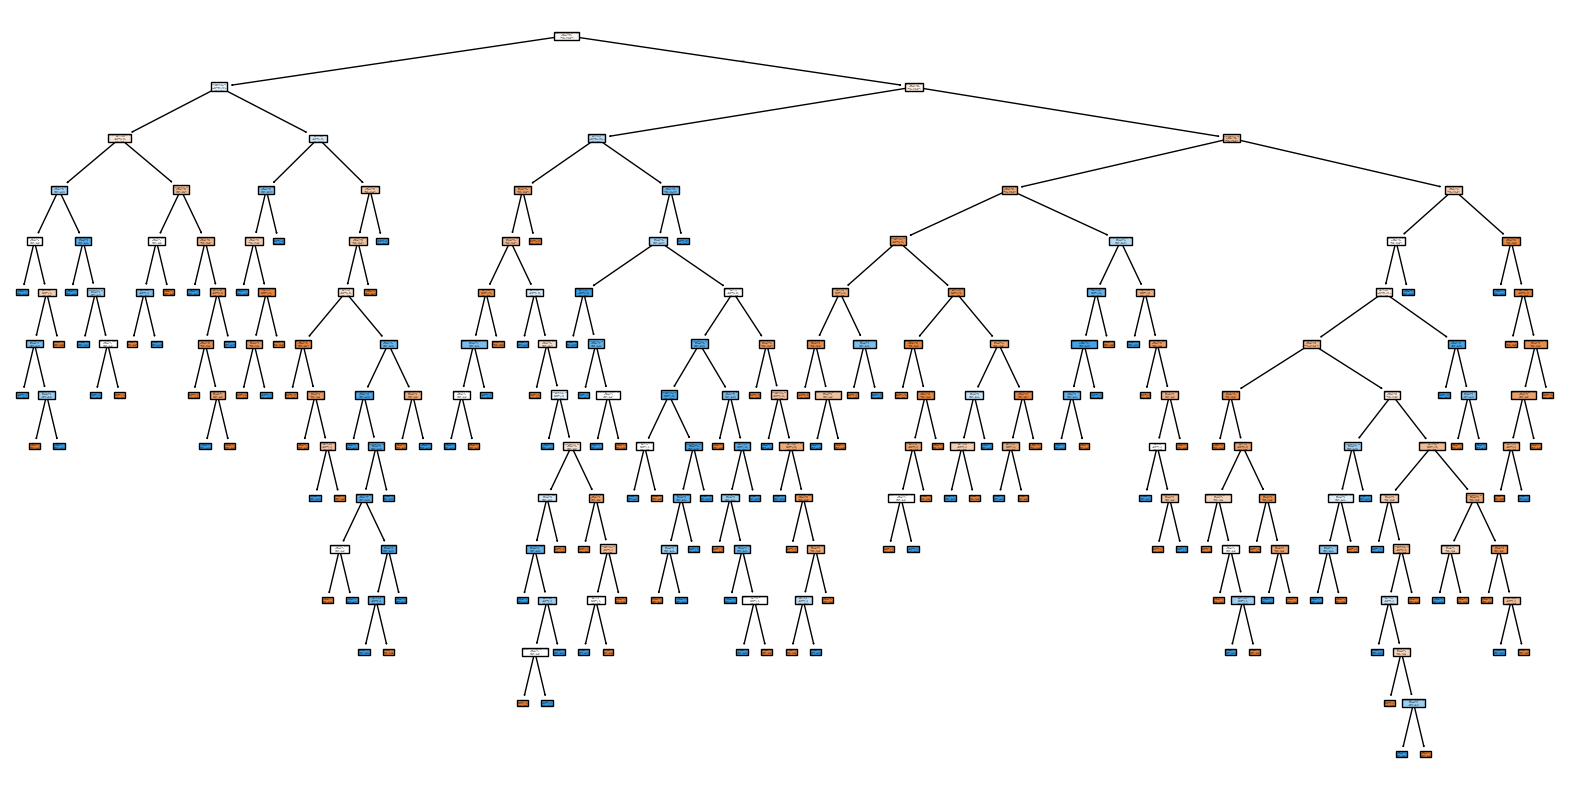

In [126]:
plt.figure(figsize = (20, 10))
plot_tree(model.estimators_[2], feature_names = ['race/ethnicity', 'parental level of education', 'test preparation course', 'math score',  'reading score', 'writing score'],
          class_names = ['male', 'female'], filled = True) #model.estimators_[2] - доступ якого саме дерева з вибірки побудується діаграма
plt.show()

AdaBoost

In [129]:
X = df_normalized.drop(['gender'], axis = 1)
y = df_normalized['gender']

#X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)

model = AdaBoostClassifier(n_estimators=100) #max_depth=1, як наприклад, можна задавати для DecisionTreeClassifier
model.fit(X, y)

AdaBoostClassifier(n_estimators=100)

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [135]:
y_pred = model.predict(X_test)

In [136]:
print(confusion_matrix(y_test, y_pred))

[[96  6]
 [11 87]]


In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       102
           1       0.94      0.89      0.91        98

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



In [139]:
print(accuracy_score(y_test,y_pred))

0.915
